## Import relevant libraries

In [22]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [23]:
print("The current working directory is: ",
       os.getcwd()
     )

The current working directory is:  c:\Users\30697\Desktop\Jobs\Job Descriptions\ML_assignment_2025


In [24]:
energy = pd.read_excel("energy_data.xlsx")

In [25]:
energy.head()

,starting_time,CO2factor,solar,landwind,seawind,biomass
0,2020-12-31 23:00:00,0.361425,0,82894,256749,662593
1,2021-01-01 00:00:00,0.358140,0,95906,325500,675321
2,2021-01-01 01:00:00,0.349210,0,122117,332500,588699
3,2021-01-01 02:00:00,0.339635,0,87353,322749,487599
4,2021-01-01 03:00:00,0.330915,0,59687,351750,392943


In [26]:
energy.tail()

,starting_time,CO2factor,solar,landwind,seawind,biomass
35059,2024-12-31 18:00:00,0.094857,0,6375458,3711000,70087
35060,2024-12-31 19:00:00,0.086264,0,6448966,3718000,70205
35061,2024-12-31 20:00:00,0.083229,0,6472458,3744500,70264
35062,2024-12-31 21:00:00,0.081749,0,6486790,3686750,70263
35063,2024-12-31 22:00:00,0.077602,0,6499171,3719250,70146


In [27]:
energy.shape

(35064, 6)

## Visualization of the response and features

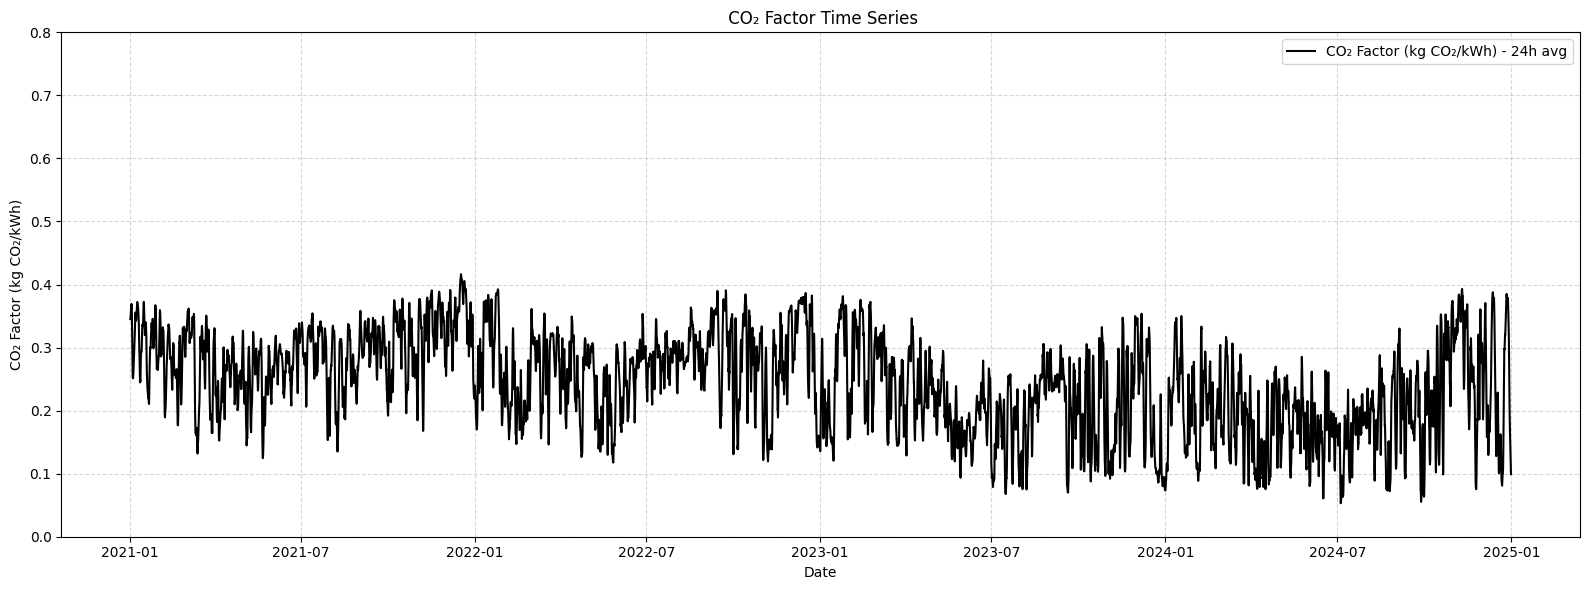

In [28]:
# CO2 factor

# smooth the curve using a rolling average (e.g., 24-hour window)
energy['CO2factor_smooth'] = energy['CO2factor'].rolling(window=24, center=True).mean()

# Plot
plt.figure(figsize=(16, 6))
plt.plot(energy['starting_time'], energy['CO2factor_smooth'], label='CO₂ Factor (kg CO₂/kWh) - 24h avg', color='black')
plt.xlabel('Date')
plt.ylabel('CO₂ Factor (kg CO₂/kWh)')
plt.title(' CO₂ Factor Time Series')
plt.grid(True, linestyle='--', alpha=0.5)
plt.legend()
plt.ylim(0, 0.8)
plt.tight_layout()
plt.show()


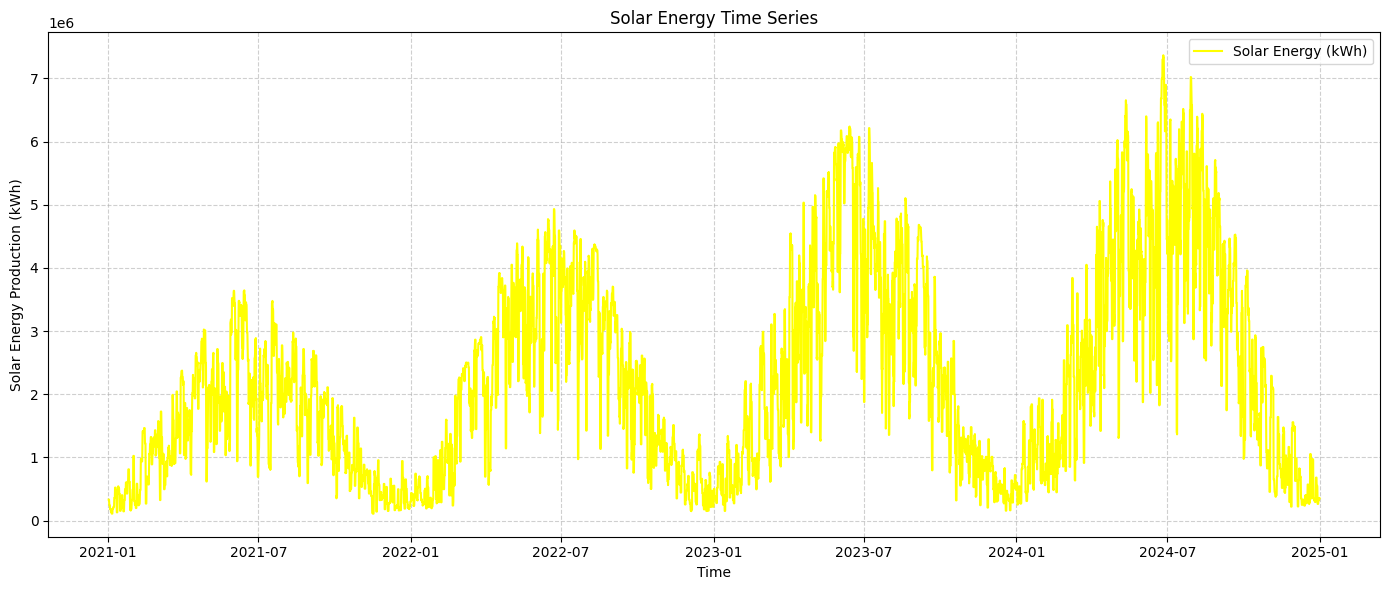

In [29]:
# solar energy

energy['solar_smooth'] = energy['solar'].rolling(window=24, center=True).mean()
plt.figure(figsize=(14, 6))
plt.plot(energy['starting_time'], energy['solar_smooth'], label='Solar Energy (kWh)', color='yellow')
plt.xlabel('Time')
plt.ylabel('Solar Energy Production (kWh)')
plt.title('Solar Energy Time Series')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

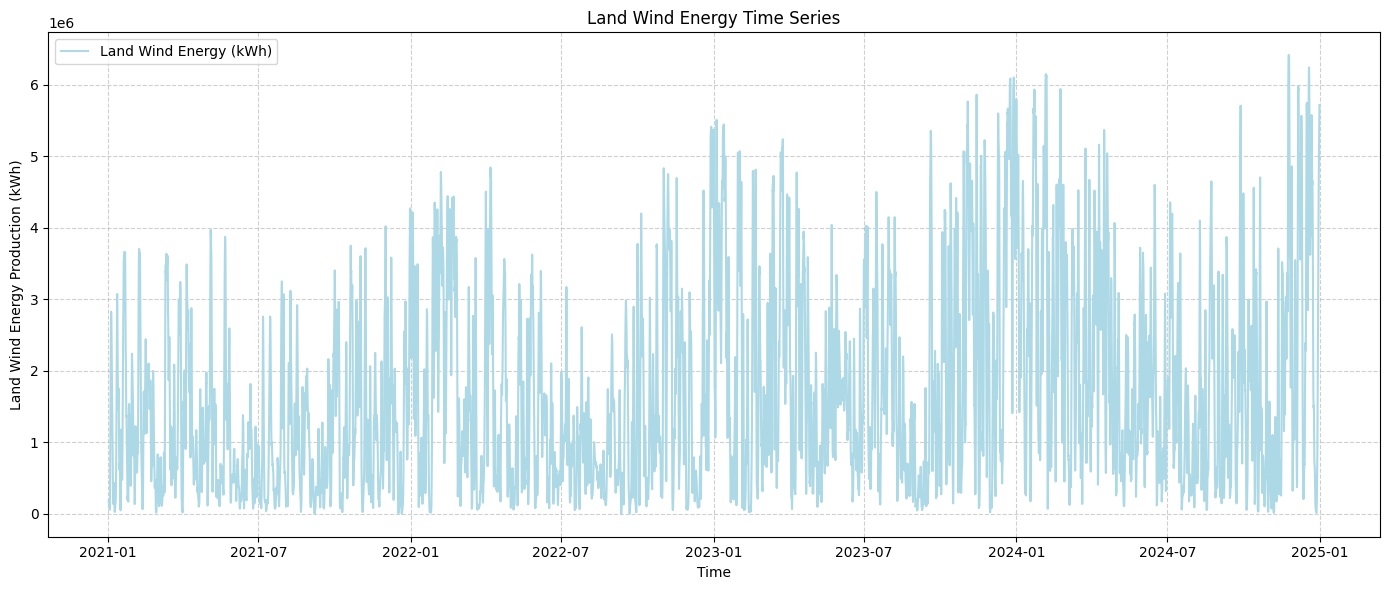

In [30]:

energy['landwind_smooth'] = energy['landwind'].rolling(window=24, center=True).mean()

plt.figure(figsize=(14, 6))
plt.plot(energy['starting_time'], energy['landwind_smooth'], label='Land Wind Energy (kWh)', color='lightblue')
plt.xlabel('Time')
plt.ylabel('Land Wind Energy Production (kWh)')
plt.title('Land Wind Energy Time Series')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

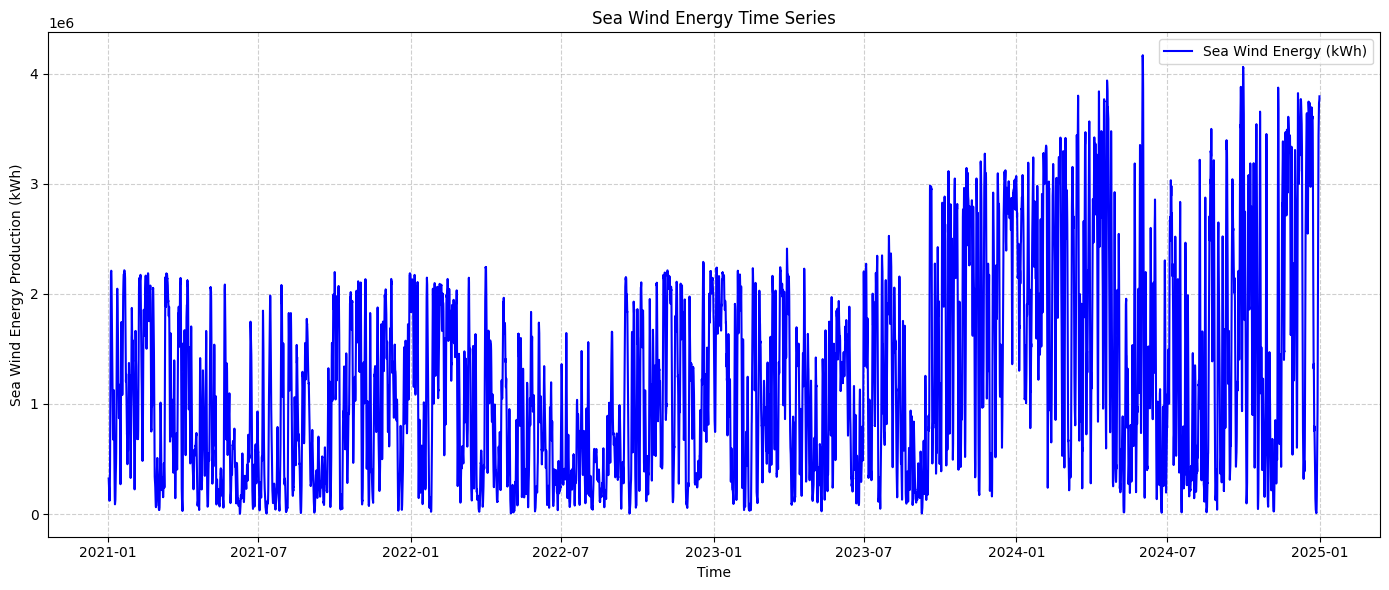

In [31]:
energy['seawind_smooth'] = energy['seawind'].rolling(window=24, center=True).mean()

plt.figure(figsize=(14, 6))
plt.plot(energy['starting_time'], energy['seawind_smooth'], label='Sea Wind Energy (kWh)', color='blue')
plt.xlabel('Time')
plt.ylabel('Sea Wind Energy Production (kWh)')
plt.title('Sea Wind Energy Time Series')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

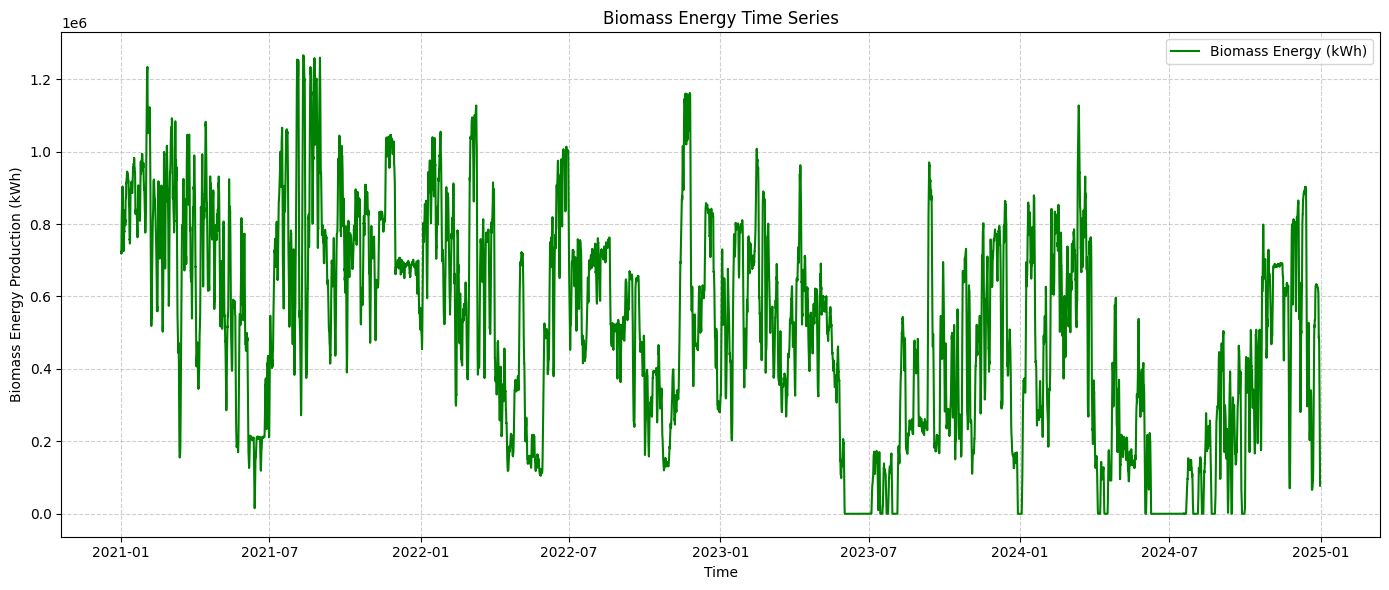

In [32]:
energy['biomass_smooth'] = energy['biomass'].rolling(window=24, center=True).mean()

plt.figure(figsize=(14, 6))
plt.plot(energy['starting_time'], energy['biomass_smooth'], label='Biomass Energy (kWh)', color='green')
plt.xlabel('Time')
plt.ylabel('Biomass Energy Production (kWh)')
plt.title('Biomass Energy Time Series')
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

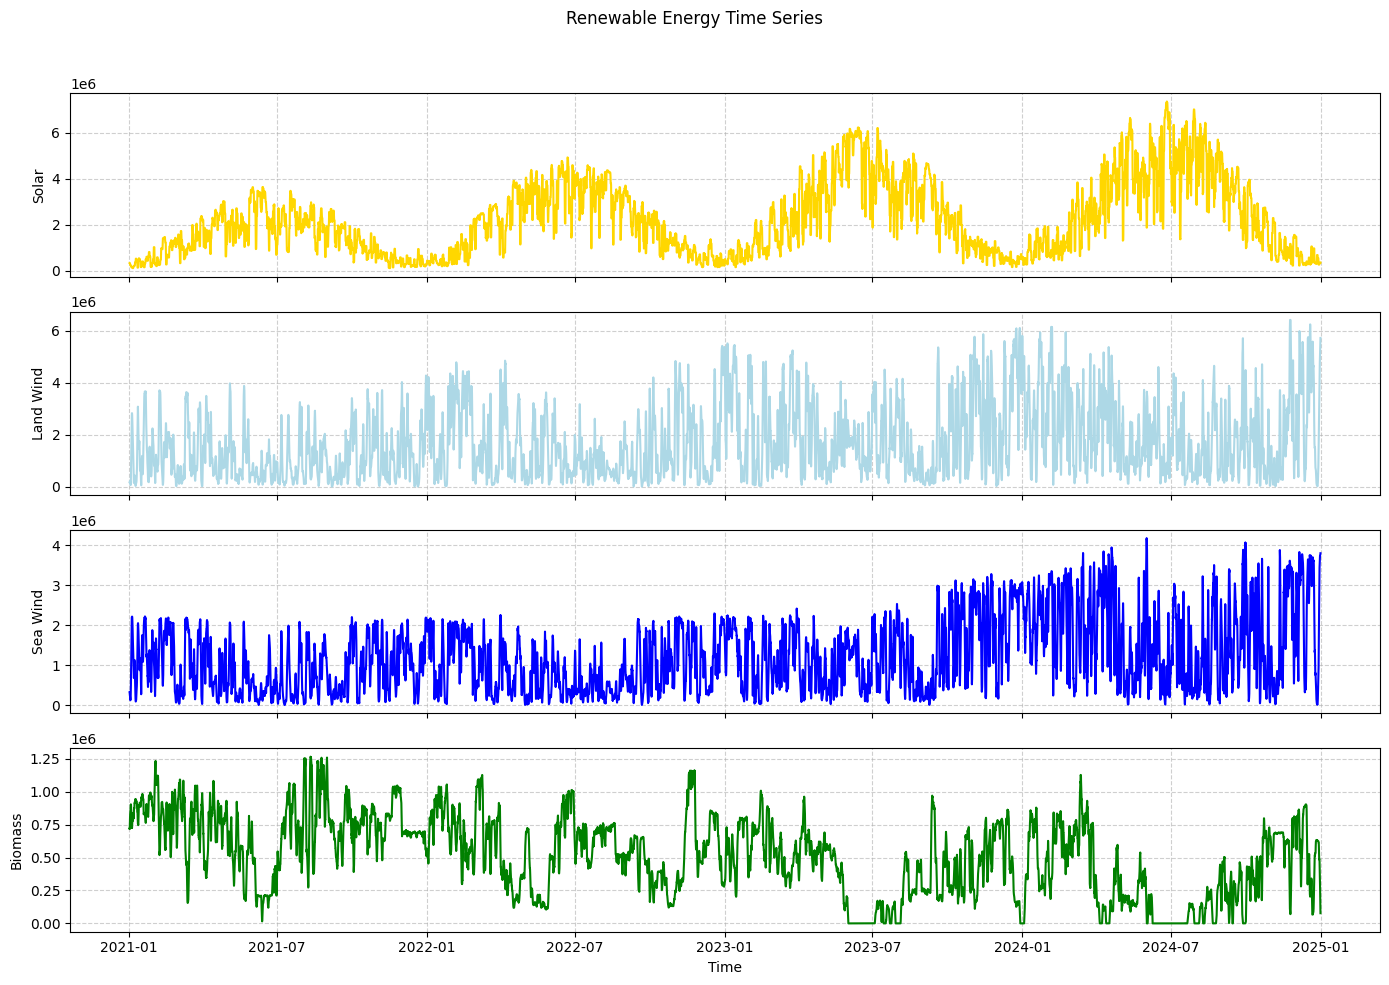

In [35]:
fig, axs = plt.subplots(4, 1, figsize=(14, 10), sharex=True)

axs[0].plot(energy['starting_time'], energy['solar_smooth'], color='gold')
axs[0].set_ylabel('Solar')
axs[0].grid(True, linestyle='--', alpha=0.6)

axs[1].plot(energy['starting_time'], energy['landwind_smooth'], color='lightblue')
axs[1].set_ylabel('Land Wind')
axs[1].grid(True, linestyle='--', alpha=0.6)

axs[2].plot(energy['starting_time'], energy['seawind_smooth'], color='blue')
axs[2].set_ylabel('Sea Wind')
axs[2].grid(True, linestyle='--', alpha=0.6)

axs[3].plot(energy['starting_time'], energy['biomass_smooth'], color='green')
axs[3].set_ylabel('Biomass')
axs[3].set_xlabel('Time')
axs[3].grid(True, linestyle='--', alpha=0.6)

fig.suptitle('Renewable Energy Time Series')
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()


In [ ]:
# drop smoothed variable cols made for plotting
energy = energy.drop(columns=['CO2factor_smooth', 'solar_smooth', 'landwind_smooth', 'seawind_smooth', 'biomass_smooth'])



## Variable distributions and relationships

### Scatterplots, Histograms, KDEs (Attention!!! takes 5+ min to run on my computer)

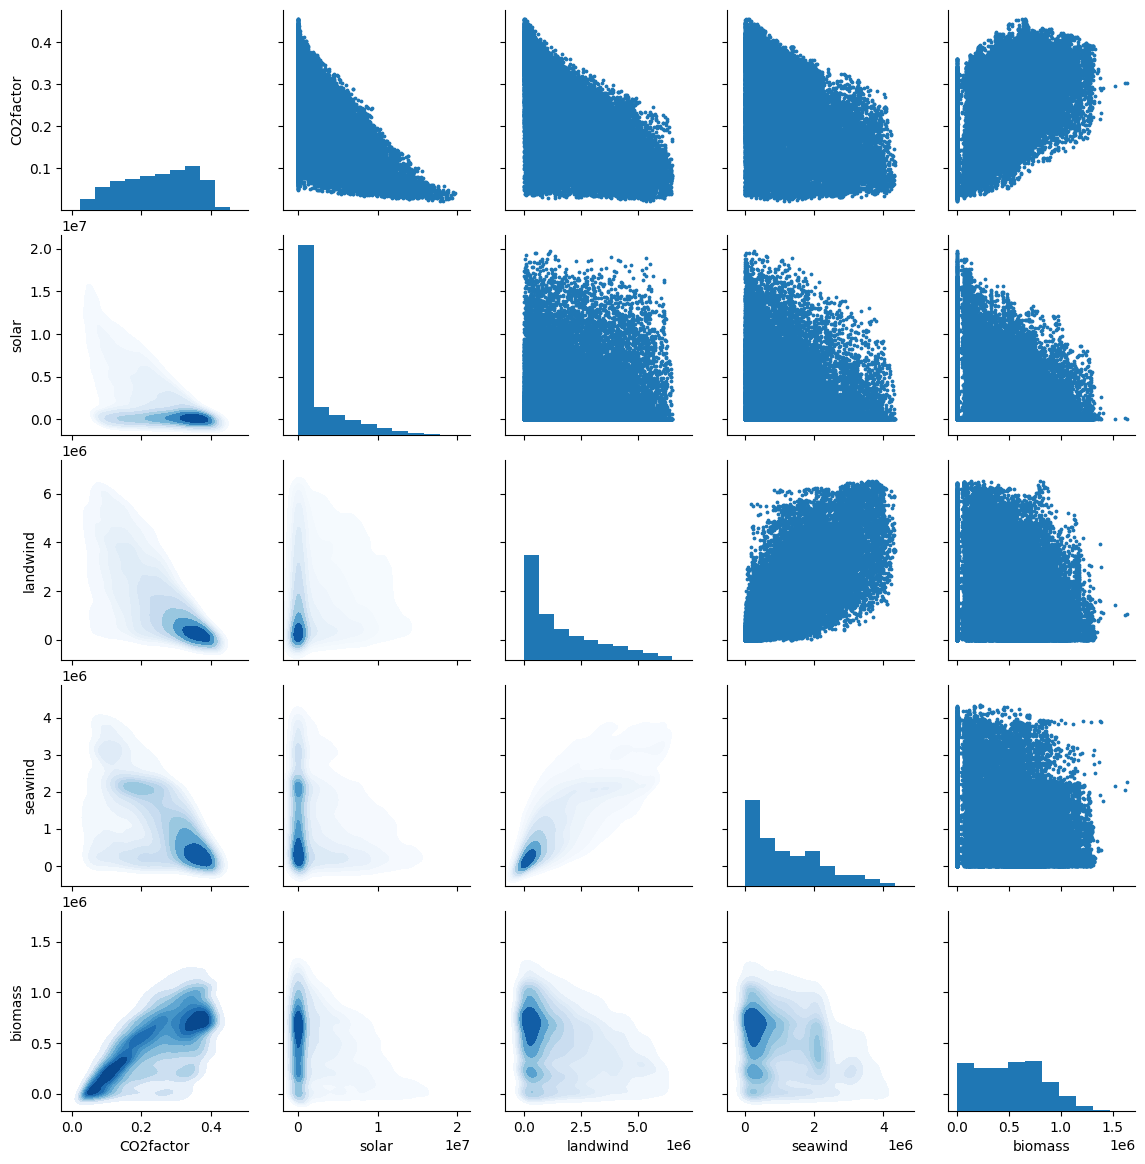

In [17]:
cols = ['CO2factor', 'solar', 'landwind', 'seawind', 'biomass']  # variables to plot
pair_data = energy[cols].copy()


 # Create the PairGrid
g = sns.PairGrid(pair_data, height=2)
g.map_upper(plt.scatter, s=3)
g.map_diag(plt.hist)
g.map_lower(sns.kdeplot, fill=True, cmap='Blues')  # fill=True is preferred in new seaborn
g.figure.set_size_inches(12, 12)
plt.show()

### Correlation Matrix Heatmap

In [18]:
# drop datetime column
energy_corr = energy.drop(columns=['starting_time'])

# Compute correlation
corr_matrix = energy_corr.corr()

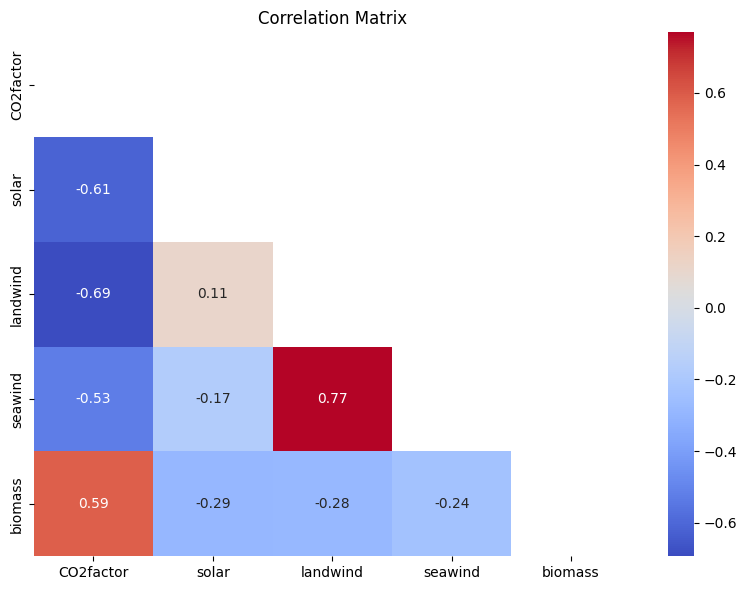

In [19]:
np.fill_diagonal(corr_matrix.values, np.nan)  # remove correlations of variables with themselves
mask = np.triu(np.ones_like(corr_matrix, dtype=bool)) # show lower triangle only in heatmap

plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm', mask = mask)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

## Descriptive Statistics

In [ ]:

energy.drop(columns='starting_time').describe().round(2) 


,CO2factor,solar,landwind,seawind,biomass
count,35064.00,35064.00,35064.00,35064.00,35064.00
mean,0.24,2202041.57,1688767.74,1206620.11,507932.96
std,0.10,3532621.34,1627761.43,1009525.20,316022.66
min,0.02,0.00,0.00,0.00,0.00
25%,0.16,0.00,328458.00,332749.00,241010.00
50%,0.25,71453.00,1123035.00,959000.00,518188.50
75%,0.33,3271873.00,2702556.75,1952250.00,741465.25
max,0.45,19736230.00,6518273.00,4342999.00,1637997.00
